In [20]:
#importing libraries 
import pandas as pd
import numpy as np 

In [21]:
heart_dataset= pd.read_csv('/Users/IMADN/Desktop/ML2/heart failur classification dataset.csv')
heart_dataset.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [22]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              293 non-null    float64
 10  sex                       299 non-null    object 
 11  smoking                   299 non-null    object 
 12  time                      292 non-null    float64
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

In [23]:
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [24]:
#removing null rows
heart_dataset = heart_dataset.dropna(how = 'any', axis = 0)
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
#removing unnamed column
heart_dataset.drop("Unnamed: 0",axis=1,inplace=True)
heart_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,Male,Yes,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140.0,Male,Yes,258.0,0
293,63.0,1,103,1,35,0,179000.00,0.9,136.0,Male,Yes,270.0,0
294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0


In [26]:
#Encoding categorical features 
heart_dataset['sex'].unique()
heart_dataset['smoking'].unique()

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
heart_dataset['sex']= enc.fit_transform(heart_dataset['sex'])
heart_dataset['smoking']= enc.fit_transform(heart_dataset['smoking'])
heart_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,1,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,0,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,1,1,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140.0,1,1,258.0,0
293,63.0,1,103,1,35,0,179000.00,0.9,136.0,1,1,270.0,0
294,62.0,0,61,1,38,1,155000.00,1.1,143.0,1,1,270.0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,0,0,278.0,0


In [27]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(heart_dataset)
heart_dataset1= scaler.transform(heart_dataset)   
heart_dataset1

array([[0.27272727, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 0.00364964,
        1.        ],
       [0.18181818, 1.        , 0.01122735, ..., 0.        , 0.00364964,
        1.        ],
       ...,
       [0.4       , 0.        , 0.00484818, ..., 1.        , 0.96350365,
        0.        ],
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.99270073,
        0.        ],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.        ]])

In [28]:
#train test split
features= heart_dataset[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
label= heart_dataset[['DEATH_EVENT']]
stratified = pd.DataFrame(label)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, stratify=stratified, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (228, 12)
y_train shape: (228, 1)
X_test shape: (58, 12)
y_test shape: (58, 1)


In [29]:
#Logistic Regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [30]:
#training of the model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
s1 = accuracy_score(y_test, predictions)
print(s1)

0.8448275862068966


C:\Users\IMADN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\IMADN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
s2 = accuracy_score(y_pred,y_test)
print(s2)

0.7586206896551724


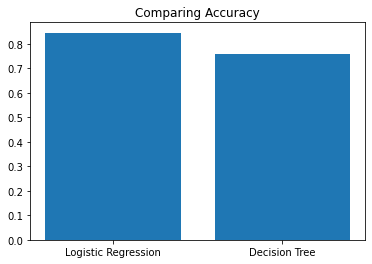

In [32]:
#barchart
plt.bar(['Logistic Regression', 'Decision Tree'],[s1, s2])
plt.title('Comparing Accuracy')
plt.show()